<a href="https://colab.research.google.com/github/nazaninbondarian/MachineLearning2024/blob/main/Chapter%202/Question%203/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..

/content


In [ ]:
import os

# Define the folder name
folder_name = "Data"

# Check if the folder already exists, and create it if not
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Commented out IPython magic to ensure Python compatibility.
%cd Data

/content/Data


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

Dataset URL: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
License(s): unknown
  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 3.69MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  drugs-a-b-c-x-y-for-decision-trees.zip
  inflating: drug200.csv             


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
df.shape

(200, 6)

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Text(0.5, 1.0, 'Drug')

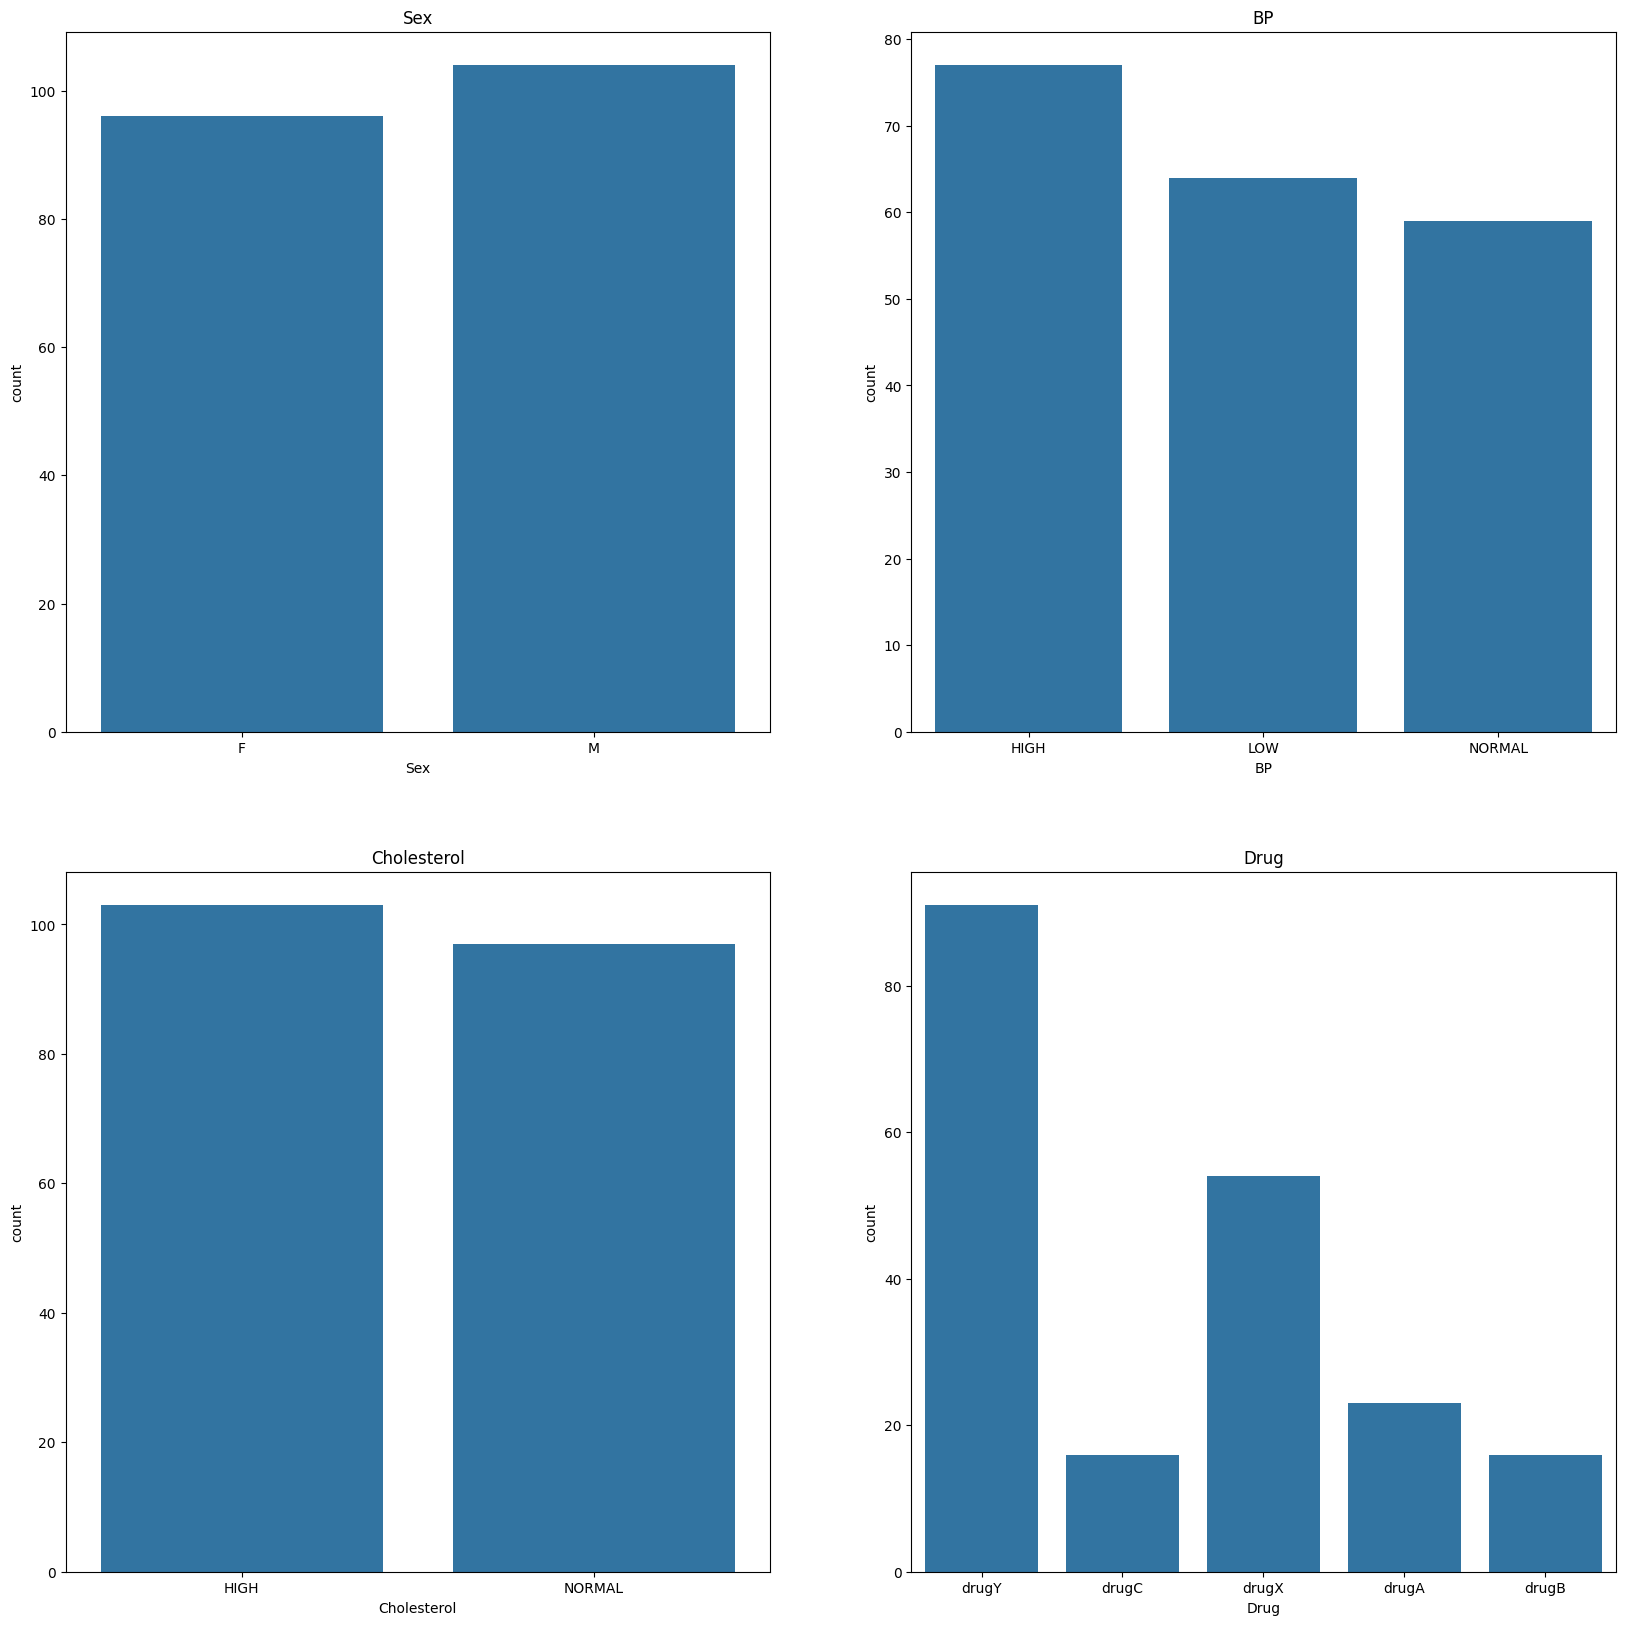

In [ ]:
# Create a 2x2 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
sns.countplot(data=df, x = "Sex").set_title('Sex')

plt.subplot(2,2,2)
sns.countplot(data=df, x = "BP").set_title('BP')

plt.subplot(2,2,3)
sns.countplot(data=df, x = "Cholesterol").set_title('Cholesterol')

plt.subplot(2,2,4)
sns.countplot(data=df, x = "Drug").set_title('Drug')

<Axes: xlabel='Drug', ylabel='count'>

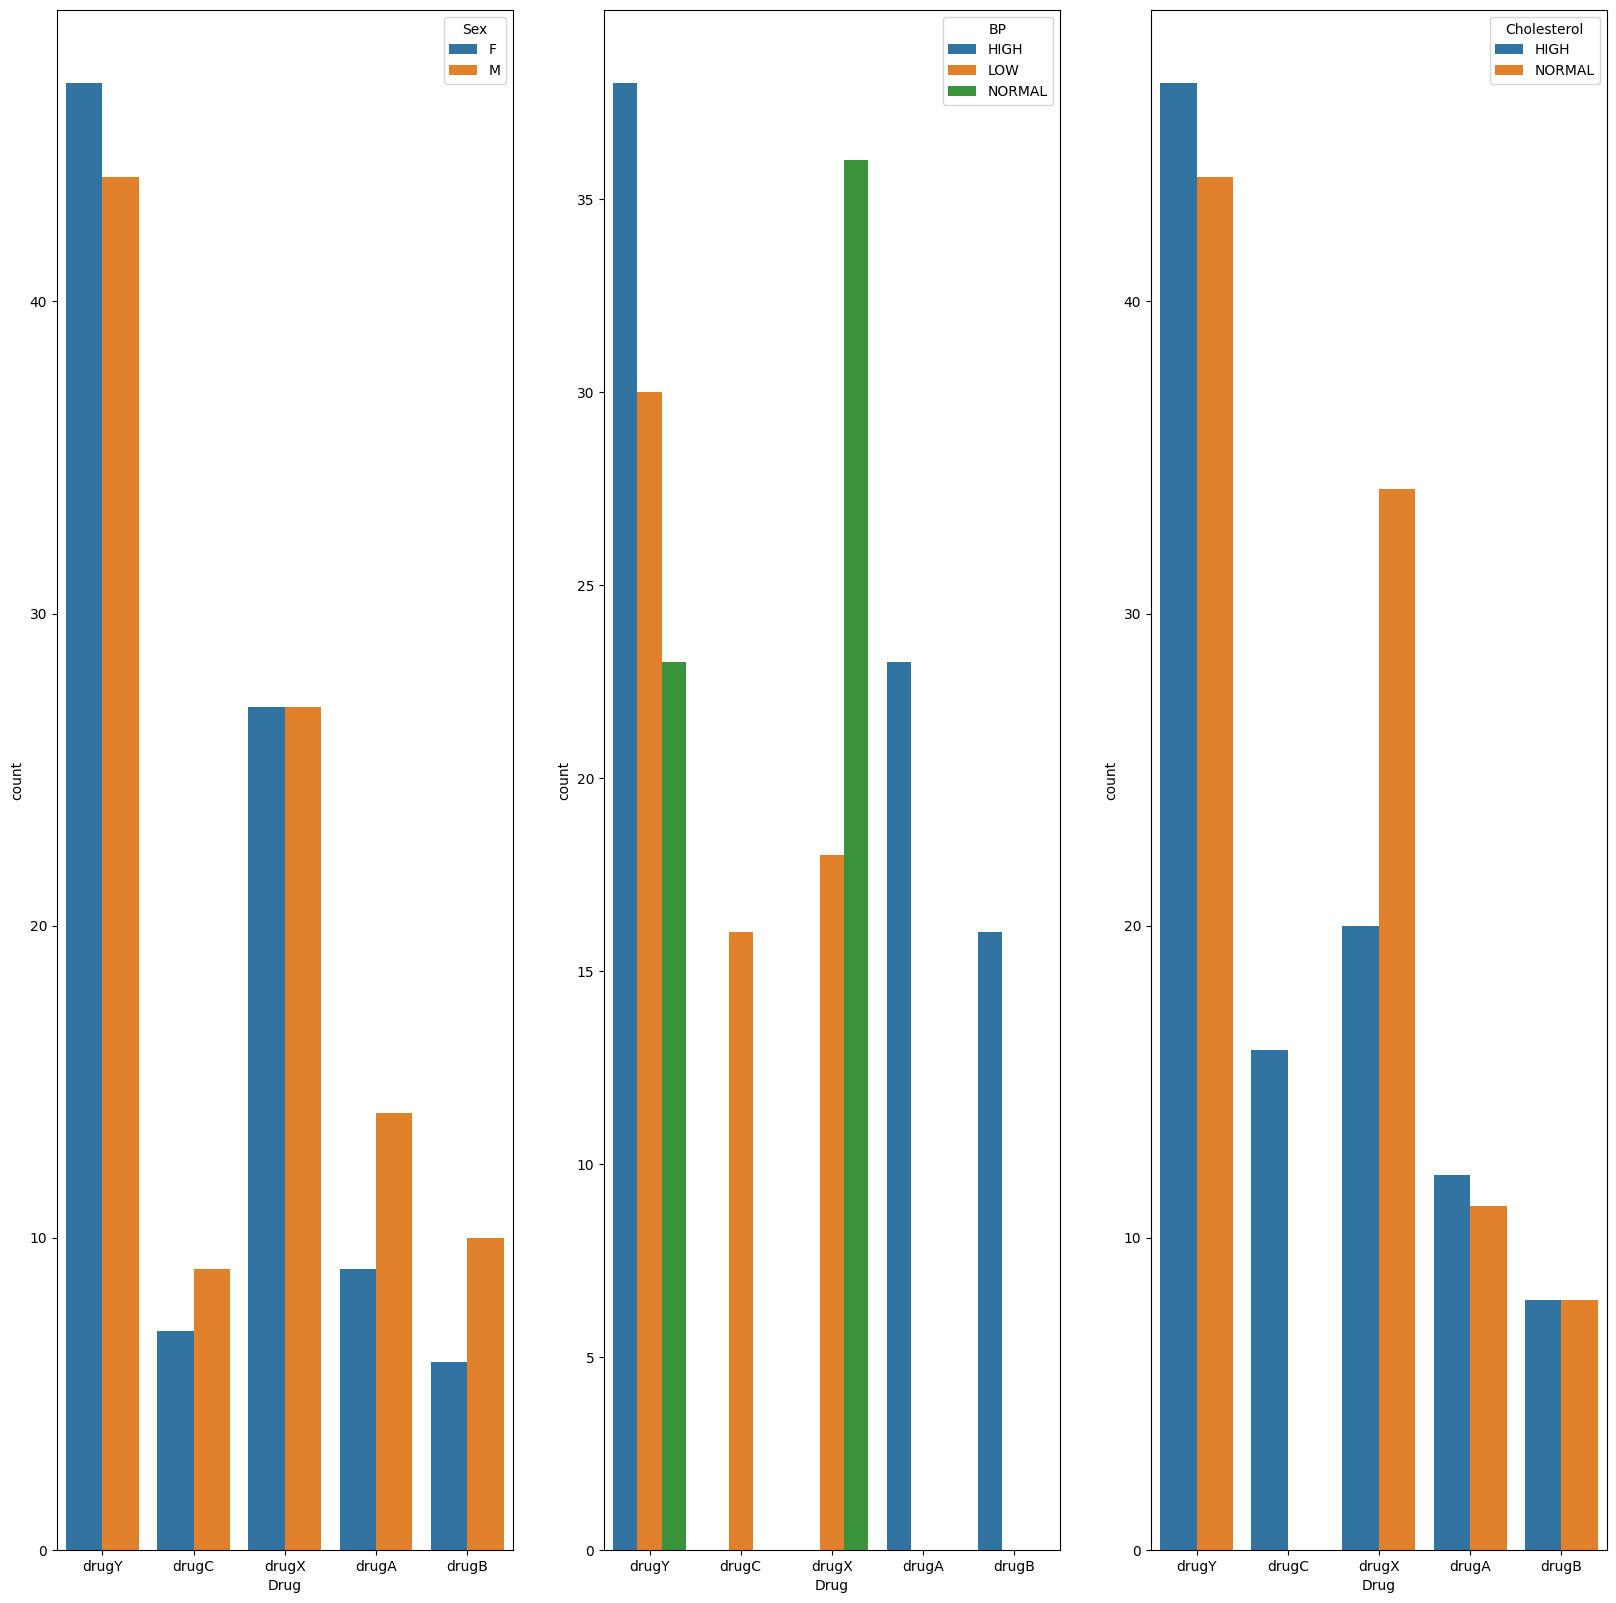

In [ ]:
# Create a 1x3 grid of subplots for various numerical variables
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
sns.countplot(data=df, x = "Drug", hue="Sex")

plt.subplot(1,3,2)
sns.countplot(data=df, x = "Drug", hue="BP")

plt.subplot(1,3,3)
sns.countplot(data=df, x = "Drug", hue="Cholesterol")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sex"] = le.fit_transform(df[["Sex"]])
df["BP"] = le.fit_transform(df[["BP"]])
df["Cholesterol"] = le.fit_transform(df[["Cholesterol"]])

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [ ]:
X=np.array(df.loc[:,df.columns!='Drug'])
y=np.array(df.loc[:,df.columns=='Drug'])
print('X:', X.shape,'\ny:', y.shape)

X: (200, 5) 
y: (200, 1)


In [ ]:
df.groupby('Drug').size()

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=76)
print('train:',x_train.shape, y_train.shape,'\ntest: ', x_test.shape, y_test.shape)

train: (140, 5) (140, 1) 
test:  (60, 5) (60, 1)


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train = x_train_scaled
x_test = x_test_scaled
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 5)
(60, 5)
(140, 1)
(60, 1)


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=76)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

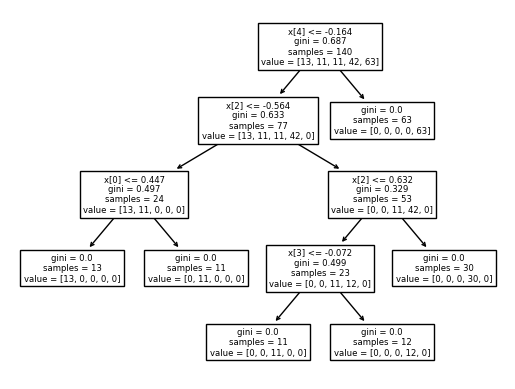

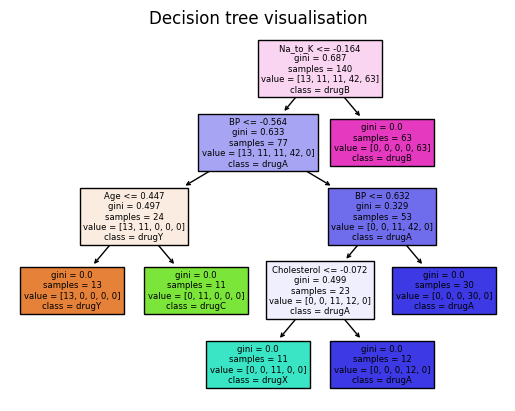

In [ ]:
tree.plot_tree(clf)
plt.show()
tree.plot_tree(clf,feature_names=df.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()

In [90]:
print("node_count:", clf.tree_.node_count)
print("n_leaves:", clf.tree_.n_leaves)
print("n_node_samples:", clf.tree_.n_node_samples)
print("children_left:", clf.tree_.children_left)
print("children_right:", clf.tree_.children_right)
print("value:", clf.tree_.value)
print("feature:", clf.tree_.feature)
print("threshold:", clf.tree_.threshold)
print("impurity:", clf.tree_.impurity)
print("max_depth:", clf.tree_.max_depth)

node_count: 11
n_leaves: 6
n_node_samples: [140  77  24  13  11  53  23  11  12  30  63]
children_left: [ 1  2  3 -1 -1  6  7 -1 -1 -1 -1]
children_right: [10  5  4 -1 -1  9  8 -1 -1 -1 -1]
value: [[[13. 11. 11. 42. 63.]]

 [[13. 11. 11. 42.  0.]]

 [[13. 11.  0.  0.  0.]]

 [[13.  0.  0.  0.  0.]]

 [[ 0. 11.  0.  0.  0.]]

 [[ 0.  0. 11. 42.  0.]]

 [[ 0.  0. 11. 12.  0.]]

 [[ 0.  0. 11.  0.  0.]]

 [[ 0.  0.  0. 12.  0.]]

 [[ 0.  0.  0. 30.  0.]]

 [[ 0.  0.  0.  0. 63.]]]
feature: [ 4  2  0 -2 -2  2  3 -2 -2 -2 -2]
threshold: [-0.16413499 -0.56379378  0.44748352 -2.         -2.          0.63213241
 -0.07161146 -2.         -2.         -2.         -2.        ]
impurity: [0.68653061 0.63315905 0.49652778 0.         0.         0.32894268
 0.49905482 0.         0.         0.         0.        ]
max_depth: 4


In [91]:
r = tree.export_text(clf)
print(r)

|--- feature_4 <= -0.16
|   |--- feature_2 <= -0.56
|   |   |--- feature_0 <= 0.45
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  0.45
|   |   |   |--- class: drugB
|   |--- feature_2 >  -0.56
|   |   |--- feature_2 <= 0.63
|   |   |   |--- feature_3 <= -0.07
|   |   |   |   |--- class: drugC
|   |   |   |--- feature_3 >  -0.07
|   |   |   |   |--- class: drugX
|   |   |--- feature_2 >  0.63
|   |   |   |--- class: drugX
|--- feature_4 >  -0.16
|   |--- class: drugY



In [92]:
y_pred = clf.predict(x_test)
print("score:",clf.score(x_test, y_test))

score: 0.9833333333333333


In [93]:
print("proba:", clf.predict_proba(x_test))

proba: [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1

In [94]:
i = 2
decision_path = clf.decision_path(x_test[[i]])
print("path:", decision_path.toarray())
print("value:", clf.predict(x_test[[i]]))

path: [[1 1 0 0 0 1 1 1 0 0 0]]
value: ['drugC']


Text(70.72222222222221, 0.5, 'True labels')

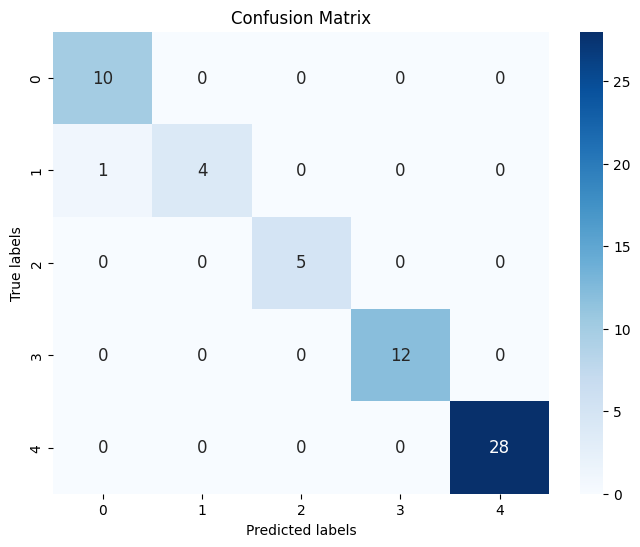

In [95]:
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [97]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       drugA       0.91      1.00      0.95        10
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        28

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.98      0.98      0.98        60



In [98]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9833333333333333
Precision: 0.9818181818181818
Recall: 0.96


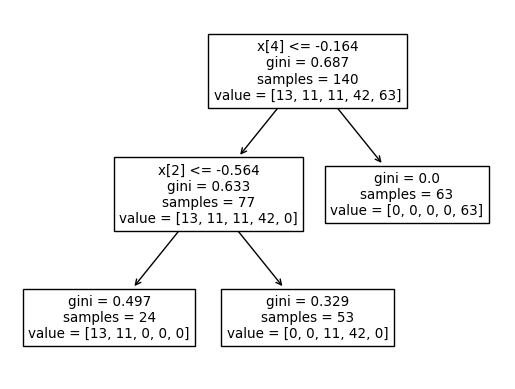

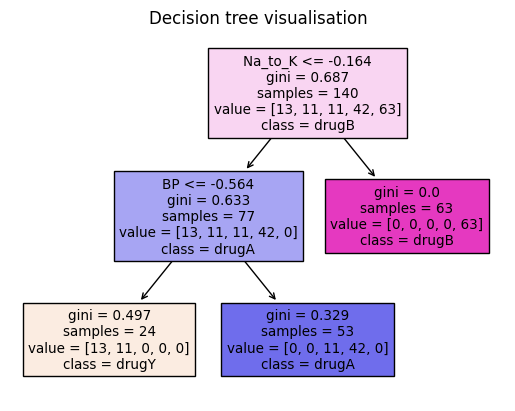

node_count: 5
n_leaves: 3
n_node_samples: [140  77  24  53  63]
children_left: [ 1  2 -1 -1 -1]
children_right: [ 4  3 -1 -1 -1]
value: [[[13. 11. 11. 42. 63.]]

 [[13. 11. 11. 42.  0.]]

 [[13. 11.  0.  0.  0.]]

 [[ 0.  0. 11. 42.  0.]]

 [[ 0.  0.  0.  0. 63.]]]
feature: [ 4  2 -2 -2 -2]
threshold: [-0.16413499 -0.56379378 -2.         -2.         -2.        ]
impurity: [0.68653061 0.63315905 0.49652778 0.32894268 0.        ]
max_depth: 2
|--- feature_4 <= -0.16
|   |--- feature_2 <= -0.56
|   |   |--- class: drugA
|   |--- feature_2 >  -0.56
|   |   |--- class: drugX
|--- feature_4 >  -0.16
|   |--- class: drugY

score: 0.8333333333333334
proba: [[0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.20754717 0.79245283 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

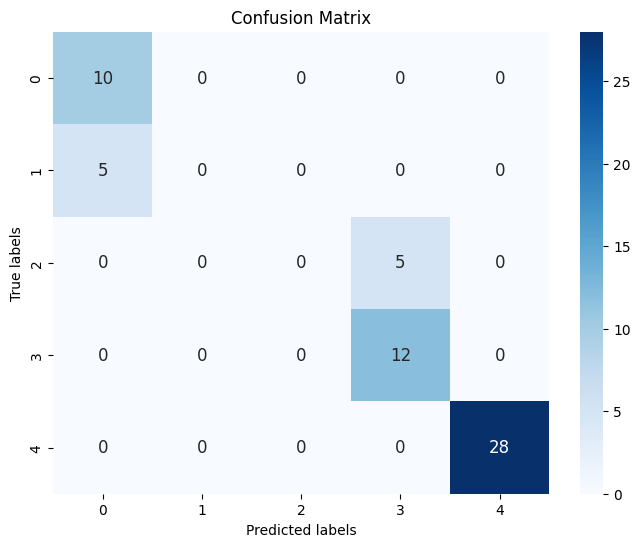

In [99]:
clf1 = tree.DecisionTreeClassifier(max_depth=2,random_state=76, ccp_alpha=0.1,)
clf1.fit(x_train, y_train)

tree.plot_tree(clf1)
plt.show()
tree.plot_tree(clf1,feature_names=df.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()

print("node_count:", clf1.tree_.node_count)
print("n_leaves:", clf1.tree_.n_leaves)
print("n_node_samples:", clf1.tree_.n_node_samples)
print("children_left:", clf1.tree_.children_left)
print("children_right:", clf1.tree_.children_right)
print("value:", clf1.tree_.value)
print("feature:", clf1.tree_.feature)
print("threshold:", clf1.tree_.threshold)
print("impurity:", clf1.tree_.impurity)
print("max_depth:", clf1.tree_.max_depth)

r = tree.export_text(clf1)
print(r)

y_pred1 = clf1.predict(x_test)
print("score:", clf1.score(x_test, y_test))

print("proba:", clf1.predict_proba(x_test))

i = 2
decision_path1 = clf1.decision_path(x_test[[i]])
print("path:", decision_path1.toarray())
print("value:", clf1.predict(x_test[[i]]))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred1)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred1))

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

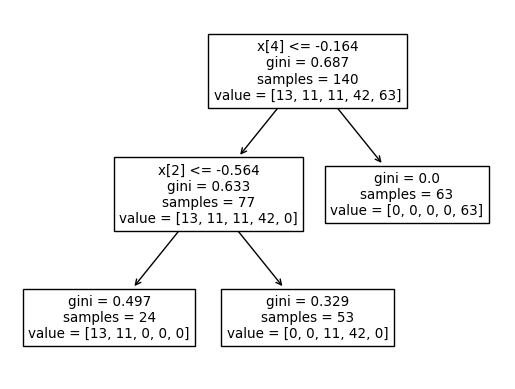

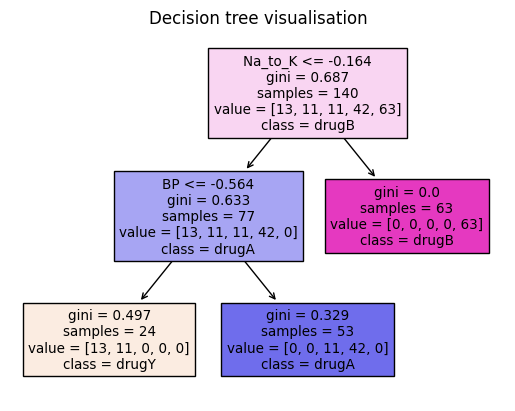

node_count: 5
n_leaves: 3
node_count: [140  77  24  53  63]
children_left: [ 1  2 -1 -1 -1]
children_right: [ 4  3 -1 -1 -1]
value: [[[13. 11. 11. 42. 63.]]

 [[13. 11. 11. 42.  0.]]

 [[13. 11.  0.  0.  0.]]

 [[ 0.  0. 11. 42.  0.]]

 [[ 0.  0.  0.  0. 63.]]]
feature: [ 4  2 -2 -2 -2]
threshold: [-0.16413499 -0.56379378 -2.         -2.         -2.        ]
impurity: [0.68653061 0.63315905 0.49652778 0.32894268 0.        ]
max_depth: 2
|--- feature_4 <= -0.16
|   |--- feature_2 <= -0.56
|   |   |--- class: drugA
|   |--- feature_2 >  -0.56
|   |   |--- class: drugX
|--- feature_4 >  -0.16
|   |--- class: drugY

score: 0.8333333333333334
proba: [[0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.20754717 0.79245283 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

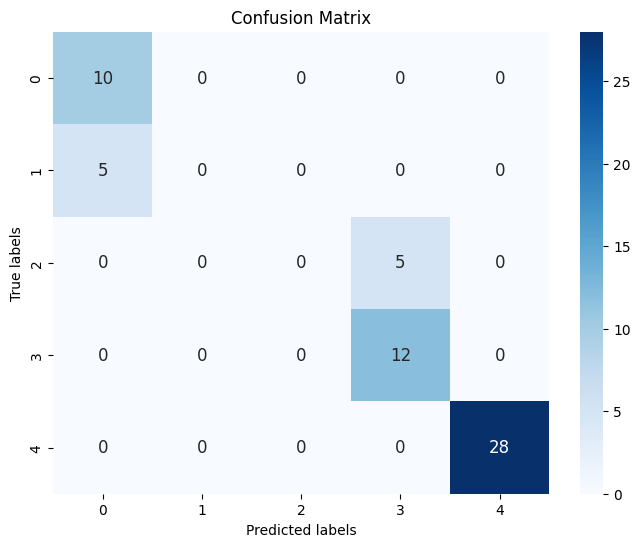

In [101]:
clf2 = tree.DecisionTreeClassifier(max_depth=5,random_state=76, ccp_alpha=0.1,)
clf2.fit(x_train, y_train)

tree.plot_tree(clf2)
plt.show()
tree.plot_tree(clf2,feature_names=df.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()

print("node_count:", clf2.tree_.node_count)
print("n_leaves:", clf2.tree_.n_leaves)
print("node_count:", clf2.tree_.n_node_samples)
print("children_left:", clf2.tree_.children_left)
print("children_right:", clf2.tree_.children_right)
print("value:", clf2.tree_.value)
print("feature:", clf2.tree_.feature)
print("threshold:", clf2.tree_.threshold)
print("impurity:", clf2.tree_.impurity)
print("max_depth:", clf2.tree_.max_depth)

r = tree.export_text(clf2)
print(r)

y_pred2 = clf2.predict(x_test)
print("score:", clf2.score(x_test, y_test))

print("proba:", clf2.predict_proba(x_test))

i = 1
decision_path2 = clf2.decision_path(x_test[[i]])
print("path:", decision_path2.toarray())
print("value:", clf2.predict(x_test[[i]]))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred2)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

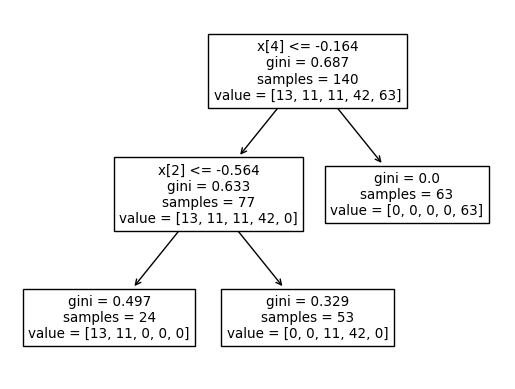

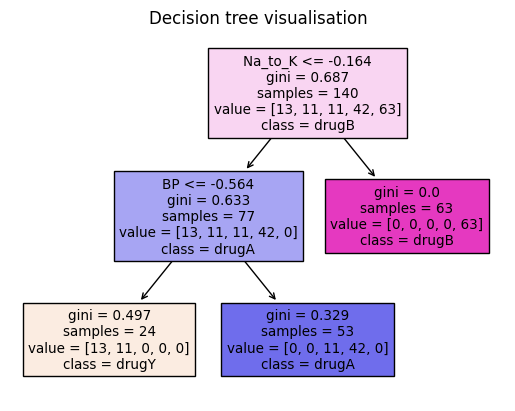

node_count: 5
n_leaves: 3
n_node_samples: [140  77  24  53  63]
hildren_left: [ 1  2 -1 -1 -1]
children_right: [ 4  3 -1 -1 -1]
value: [[[13. 11. 11. 42. 63.]]

 [[13. 11. 11. 42.  0.]]

 [[13. 11.  0.  0.  0.]]

 [[ 0.  0. 11. 42.  0.]]

 [[ 0.  0.  0.  0. 63.]]]
feature: [ 4  2 -2 -2 -2]
threshold: [-0.16413499 -0.56379378 -2.         -2.         -2.        ]
impurity: [0.68653061 0.63315905 0.49652778 0.32894268 0.        ]
max_depth: 2
|--- feature_4 <= -0.16
|   |--- feature_2 <= -0.56
|   |   |--- class: drugA
|   |--- feature_2 >  -0.56
|   |   |--- class: drugX
|--- feature_4 >  -0.16
|   |--- class: drugY

score: 0.8333333333333334
proba: [[0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.20754717 0.79245283 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         1.      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

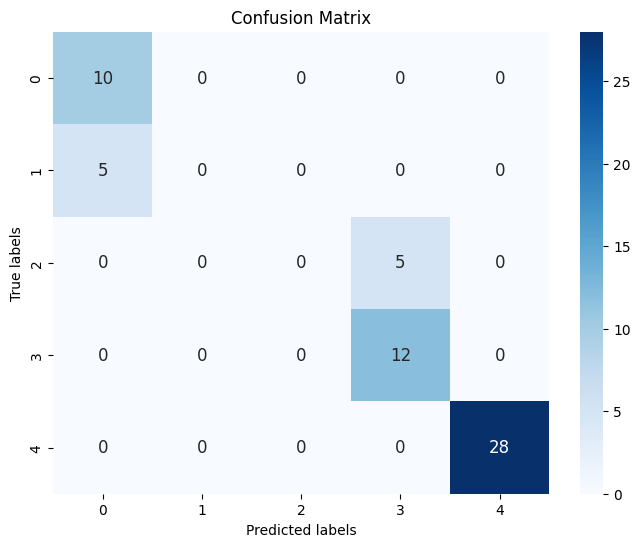

In [103]:
clf3 = tree.DecisionTreeClassifier(max_depth=2,random_state=76, ccp_alpha=0.01,)
clf3.fit(x_train, y_train)

tree.plot_tree(clf3)
plt.show()
tree.plot_tree(clf3,feature_names=df.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()

print("node_count:", clf3.tree_.node_count)
print("n_leaves:", clf3.tree_.n_leaves)
print("n_node_samples:", clf3.tree_.n_node_samples)
print("hildren_left:", clf3.tree_.children_left)
print("children_right:", clf3.tree_.children_right)
print("value:", clf3.tree_.value)
print("feature:", clf3.tree_.feature)
print("threshold:", clf3.tree_.threshold)
print("impurity:", clf3.tree_.impurity)
print("max_depth:", clf3.tree_.max_depth)

r = tree.export_text(clf3)
print(r)

y_pred3 = clf3.predict(x_test)
print("score:", clf3.score(x_test, y_test))

print("proba:", clf3.predict_proba(x_test))

i = 2
decision_path3 = clf3.decision_path(x_test[[i]])
print("path:", decision_path3.toarray())
print("value:", clf3.predict(x_test[[i]]))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred3)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='macro')
recall = recall_score(y_test, y_pred3, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

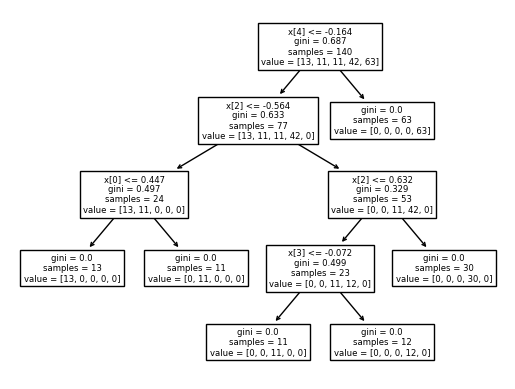

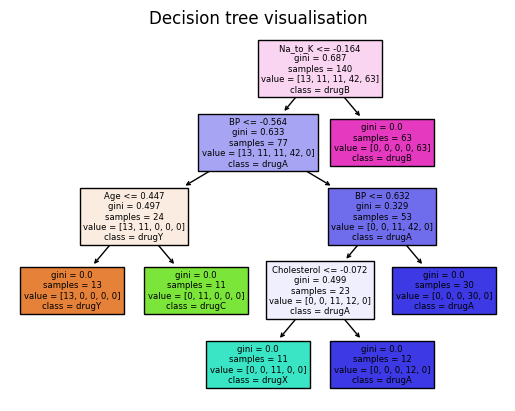

node_count: 11
n_leaves: 6
n_node_samples: [140  77  24  13  11  53  23  11  12  30  63]
children_left: [ 1  2  3 -1 -1  6  7 -1 -1 -1 -1]
children_right: [10  5  4 -1 -1  9  8 -1 -1 -1 -1]
value: [[[13. 11. 11. 42. 63.]]

 [[13. 11. 11. 42.  0.]]

 [[13. 11.  0.  0.  0.]]

 [[13.  0.  0.  0.  0.]]

 [[ 0. 11.  0.  0.  0.]]

 [[ 0.  0. 11. 42.  0.]]

 [[ 0.  0. 11. 12.  0.]]

 [[ 0.  0. 11.  0.  0.]]

 [[ 0.  0.  0. 12.  0.]]

 [[ 0.  0.  0. 30.  0.]]

 [[ 0.  0.  0.  0. 63.]]]
feature: [ 4  2  0 -2 -2  2  3 -2 -2 -2 -2]
threshold: [-0.16413499 -0.56379378  0.44748352 -2.         -2.          0.63213241
 -0.07161146 -2.         -2.         -2.         -2.        ]
impurity: [0.68653061 0.63315905 0.49652778 0.         0.         0.32894268
 0.49905482 0.         0.         0.         0.        ]
max_depth: 4
|--- feature_4 <= -0.16
|   |--- feature_2 <= -0.56
|   |   |--- feature_0 <= 0.45
|   |   |   |--- class: drugA
|   |   |--- feature_0 >  0.45
|   |   |   |--- class: drugB
|   |-

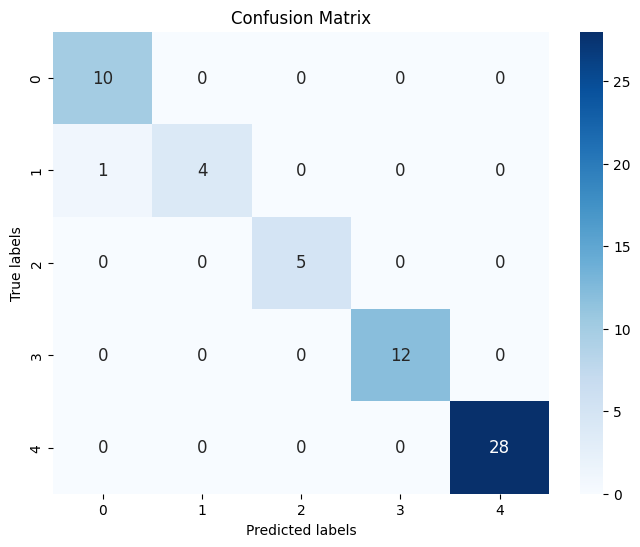

In [105]:
clf4 = tree.DecisionTreeClassifier(max_depth=5,random_state=76, ccp_alpha=0.01,)
clf4.fit(x_train, y_train)

tree.plot_tree(clf4)
plt.show()
tree.plot_tree(clf4,feature_names=df.columns,filled="True",class_names=df["Drug"].unique())
plt.title("Decision tree visualisation")
plt.show()

print("node_count:", clf4.tree_.node_count)
print("n_leaves:", clf4.tree_.n_leaves)
print("n_node_samples:", clf4.tree_.n_node_samples)
print("children_left:", clf4.tree_.children_left)
print("children_right:", clf4.tree_.children_right)
print("value:", clf4.tree_.value)
print("feature:", clf4.tree_.feature)
print("threshold:", clf4.tree_.threshold)
print("impurity:", clf4.tree_.impurity)
print("max_depth:", clf4.tree_.max_depth)

r = tree.export_text(clf4)
print(r)

y_pred4 = clf4.predict(x_test)
print("score:", clf4.score(x_test, y_test))

print("proba:", clf4.predict_proba(x_test))

i = 2
decision_path4 = clf4.decision_path(x_test[[i]])
print("path:", decision_path4.toarray())
print("value:", clf4.predict(x_test[[i]]))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred4)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred4))

accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4, average='macro')
recall = recall_score(y_test, y_pred4, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


score: 0.9833333333333333
proba: [[2.48768622e-14 2.47538526e-14 4.19036843e-06 2.47091012e-06
  9.99993339e-01]
 [1.20564781e-03 2.12461079e-12 3.94881545e-14 4.56865077e-15
  9.98794352e-01]
 [2.55110997e-13 2.49389811e-13 9.97381687e-01 2.61829336e-03
  1.91633243e-08]
 [1.20564781e-03 2.12461079e-12 3.94881545e-14 4.56865077e-15
  9.98794352e-01]
 [2.48768622e-14 2.47538526e-14 4.19036843e-06 2.47091012e-06
  9.99993339e-01]
 [4.13095840e-03 6.93003276e-12 3.37814676e-15 1.40951637e-14
  9.95869042e-01]
 [4.21359786e-15 4.21359786e-15 8.69215866e-10 2.66137460e-06
  9.99997338e-01]
 [2.48768622e-14 2.47538526e-14 4.19036843e-06 2.47091012e-06
  9.99993339e-01]
 [2.84123955e-12 1.59013137e-03 5.17962556e-14 5.99265795e-15
  9.98409869e-01]
 [4.13095840e-03 6.93003276e-12 3.37814676e-15 1.40951637e-14
  9.95869042e-01]
 [2.58302879e-13 2.48536653e-13 1.90470301e-07 9.99999377e-01
  4.33003075e-07]
 [2.48768622e-14 2.47538526e-14 4.19036843e-06 2.47091012e-06
  9.99993339e-01]
 [1.589

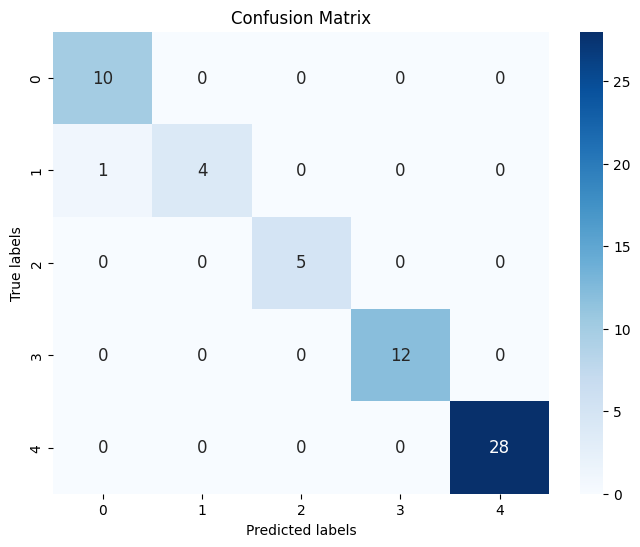

In [129]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = tree.DecisionTreeClassifier(max_depth=2)  # Using a weak classifier
clf_adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=0.1, random_state=76)
clf_adaboost.fit(x_train, y_train)

y_pred_adaboost = clf_adaboost.predict(x_test)
print("score:", clf_adaboost.score(x_test, y_test))

print("proba:", clf_adaboost.predict_proba(x_test))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_adaboost)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

accuracy = accuracy_score(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost, average='macro')
recall = recall_score(y_test, y_pred_adaboost, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

<ipython-input-128-4ea3ac441e8b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(x_train, y_train)


score: 0.9
proba: [[2.14603432e-02 1.96901694e-02 6.92075809e-02 9.24271961e-02
  7.97214710e-01]
 [9.20858935e-02 2.49308355e-02 2.72815199e-02 2.69718261e-02
  8.28729925e-01]
 [1.07920939e-01 5.33345383e-02 2.05986049e-01 4.81360982e-01
  1.51397491e-01]
 [9.71250456e-02 6.01006110e-02 3.04735330e-02 2.36449664e-02
  7.88655844e-01]
 [1.18190054e-02 2.75644818e-02 6.45623158e-02 9.53843245e-02
  8.00669873e-01]
 [9.84139361e-02 3.13413439e-02 6.45669719e-03 3.05423687e-02
  8.33245654e-01]
 [1.08371735e-02 1.51614687e-03 3.56260278e-02 1.68477456e-01
  7.83543196e-01]
 [2.59272957e-02 1.07106513e-02 6.91884990e-02 9.77760625e-02
  7.96397491e-01]
 [4.69618584e-02 1.11713188e-01 2.38195117e-02 1.87950547e-02
  7.98710387e-01]
 [9.30837162e-02 2.93792227e-02 7.13237287e-03 2.93817963e-02
  8.41022892e-01]
 [1.03634907e-01 3.55692344e-02 1.34916406e-01 5.77432361e-01
  1.48447091e-01]
 [2.26182755e-02 2.75893068e-02 7.42376008e-02 1.15545184e-01
  7.60009633e-01]
 [2.03326068e-02 3.507

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

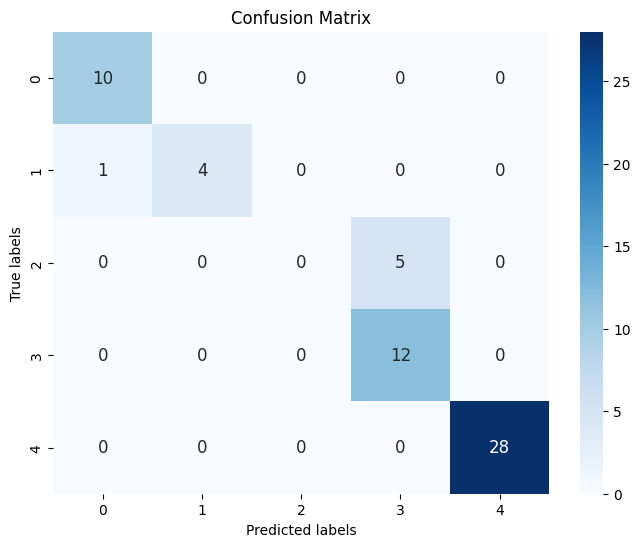

In [128]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=76)
clf_rf.fit(x_train, y_train)

y_pred_rf = clf_rf.predict(x_test)
print("score:", clf_rf.score(x_test, y_test))

print("proba:", clf_rf.predict_proba(x_test))

# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)